# Support Vector Machine for regression

### Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import svm, datasets, metrics, model_selection, preprocessing, pipeline

### Reading Data

In [2]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df = pd.read_excel(xlsx, '1x 5s')
dataset= df.copy()

### Split into target and input

In [3]:

# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')



### Split into train and test

In [4]:
# I split my data into test and train with sklearn

input_train, input_test, target_train, target_test = model_selection.train_test_split(inputs, target, train_size=0.7)

print('train samples:', len(input_train))
print('test samples', len(input_test))

train samples: 3470
test samples 1488


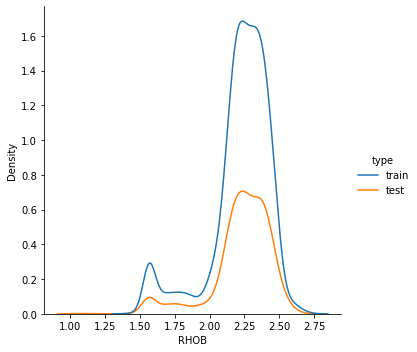

In [6]:
df_train = pd.DataFrame(target_train, columns=['RHOB'])
df_train['type'] = 'train'

df_test = pd.DataFrame(target_test, columns=['RHOB'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.displot(df_set, x="RHOB" ,hue="type", kind="kde", log_scale=False)

In [7]:
model = pipeline.make_pipeline(preprocessing.StandardScaler(), svm.SVR(C=1.0, epsilon=0.2))
model.fit(input_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

Text(0, 0.5, 'Predicted')

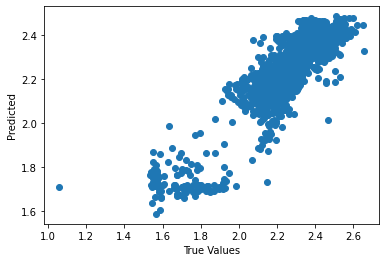

In [8]:
predicted = model.predict(input_test)

fig, ax = plt.subplots()
ax.scatter(target_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
# _ = ax.plot([1, target.max()], [1, target.max()], ls='-', color='red')

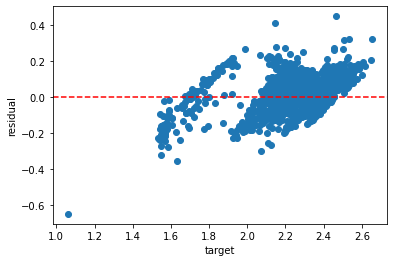

In [9]:
residual = target_test - predicted

fig, ax = plt.subplots()
ax.scatter(target_test, residual)
ax.set_xlabel('target')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

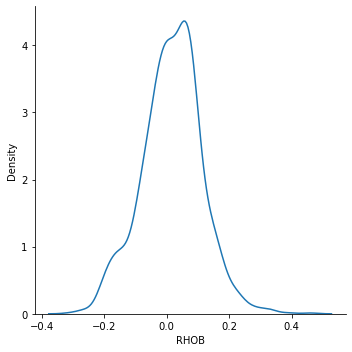

In [20]:
sns.displot(residual, kind="kde");

In [10]:
print("r2 score: {}".format(metrics.r2_score( target_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error( target_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error( target_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error( target_test, predicted)))

r2 score: 0.7927793487214482
mse: 0.009704207982735481
rmse: 0.09850993849726779
mae: 0.07666468978401196


# Predict a different well


In [13]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df2 = pd.read_excel(xlsx, '1x 4s')
dataset2= df2.copy()


# split datat into input and target

inputs2 = dataset2.copy()
target2 = inputs2.pop('RHOB')


Text(0, 0.5, 'predicted')

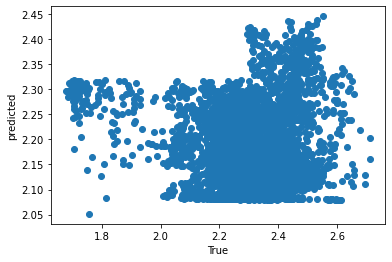

In [19]:
predicted2 = model.predict(inputs2)
fig, ax= plt.subplots()
ax.scatter(target2,predicted2)
ax.set_xlabel("True")
ax.set_ylabel("predicted")

In [20]:
print("r2 score: {}".format(metrics.r2_score( target2, predicted2)))
print("mse: {}".format(metrics.mean_squared_error( target2, predicted2)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error( target2, predicted2))))
print("mae: {}".format(metrics.mean_absolute_error( target2, predicted2)))

r2 score: -0.9761959697942999
mse: 0.04679416846117194
rmse: 0.21631959795906597
mae: 0.17742784640656115


Text(0.5, 0, 'RHOB')

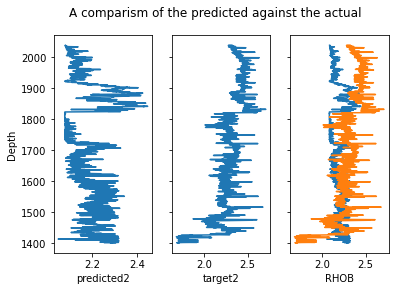

In [45]:
#plot subplots of predicted and actual
inputs2 = dataset2.copy()
Depth2= inputs2.pop("DEPTH")


fig, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True)
fig.suptitle('A comparism of the predicted against the actual')
ax1.set_ylabel("Depth")
ax1.plot(predicted2,Depth2)
ax1.set_xlabel('predicted2')

ax2.plot(target2,Depth2)
ax2.set_xlabel("target2")

ax3.plot(predicted2,Depth2)
ax3.plot(target2, Depth2)
ax3.set_xlabel("RHOB")